In [19]:
import numpy as np
import matplotlib.pyplot as mp
import sympy as sp
from sympy import simplify, Eq, cos, sin, diff
from funcionesUtiles import *
sp.init_printing()

# Definición de las coordenadas y métrica

In [20]:
t,r,theta,phi, p, a = sp.symbols("t r \\theta \\phi \\rho a")
Lambda,gamma,zeta = sp.symbols(r"\Lambda \gamma \zeta")
m, alpha, beta, m_g, c = sp.symbols(r" m \alpha \beta m_g \epsilon")

In [21]:
Lambda = -3*m_g**2*(1+alpha+beta)
display(Lambda)

In [22]:
gamma = -c*m_g**2*(1+2*alpha+3*beta)
display(gamma)

In [23]:
zeta = c**2*m_g**2*(alpha + 3*beta)
zeta

In [31]:
f=1-(1/p**2)*(2*m*r+(Lambda/3)*r**4-gamma*r**3-zeta*r**2)
Delta = p**2*f+a**2*sin(theta)**2

g=sp.Matrix([[0 for i in range(4)] for i in range(4)])
g[0,0] = -simplify(f)
g[1,1] = simplify(p**2/Delta)
g[2,2] = p**2
g[3,3] = simplify((p**2+(f-2)*a**2*sin(theta**2))*sin(theta)**2)
g[0,3] = simplify(a*sin(theta)**2*(f-1))
g[3,0] = g[0,3]
g

⎡   ⎛        2    2  2                                  2  3                  
⎢  -⎝\epsilon ⋅m_g ⋅r ⋅(\alpha + 3⋅\beta) - \epsilon⋅m_g ⋅r ⋅(2⋅\alpha + 3⋅\be
⎢  ───────────────────────────────────────────────────────────────────────────
⎢                                                                     2       
⎢                                                                 \rho        
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                   0         
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [60]:
simplify(g.subs(p**2,r**2+a**2*cos(theta)**2).subs(a,0))

⎡          2    2                                    2  2                     
⎢- \epsilon ⋅m_g ⋅r⋅(\alpha + 3⋅\beta) + \epsilon⋅m_g ⋅r ⋅(2⋅\alpha + 3⋅\beta 
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                            r                
⎢                                                                             
⎢                                                                             
⎢                                                            0                
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                            0                
⎢                                                   

# Horizonte de eventos

In [33]:
FHorizonte = p**2*f+a**2*sin(theta)**2
sp.collect(simplify(sp.expand(FHorizonte.subs(p**2,r**2+a**2*cos(theta)**2))),r)

In [37]:
FHorizonte = sp.collect(simplify(subs(FHorizonte,(p**2,r**2+a**2*cos(theta)**2),(m_g,1),(c,1))),r)
FHorizonte

## Número de soluciones de horizonte de eventos en el espacio $(\alpha-\beta)$

In [38]:
alphas=np.linspace(-10,15,100)
betas=np.linspace(-1,6,100)

In [42]:
sols_M1_0=findSolutions(f=subs(FHorizonte,(a,0),(m,1)),
                        maxNumOfSols=4,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

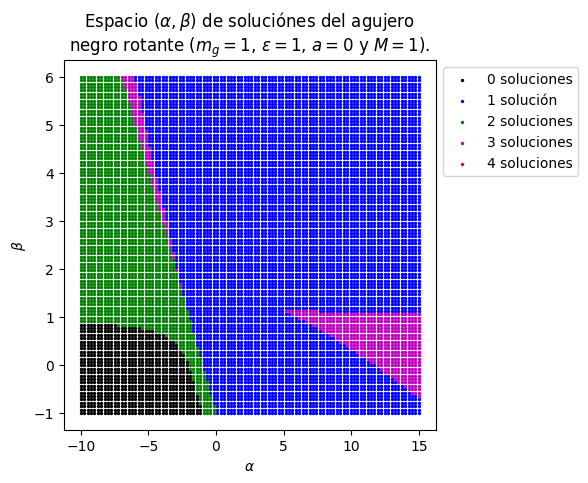

In [50]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(sols_M1_0[0][0],sols_M1_0[0][1],s=2,c="k", label="0 soluciones")
mp.scatter(sols_M1_0[1][0],sols_M1_0[1][1],s=2,c="b", label="1 solución")
mp.scatter(sols_M1_0[2][0],sols_M1_0[2][1],s=2,c="g", label="2 soluciones")
mp.scatter(sols_M1_0[3][0],sols_M1_0[3][1],s=2,c="m", label="3 soluciones")
mp.scatter(sols_M1_0[4][0],sols_M1_0[4][1],s=2,c="r", label="4 soluciones")

mp.xlabel(r"$\alpha$")
mp.ylabel(r"$\beta$")

mp.title("Espacio ($\\alpha,\\beta$) de soluciónes del agujero\nnegro rotante ($m_g=1$, $\\epsilon=1$, $a=0$ y $M=1$).")

mp.legend(bbox_to_anchor=(1,1))

In [57]:
sols_M1_a1 = findSolutions(f=subs(FHorizonte,(a,0.2),(m,1)),
                           maxNumOfSols=4,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

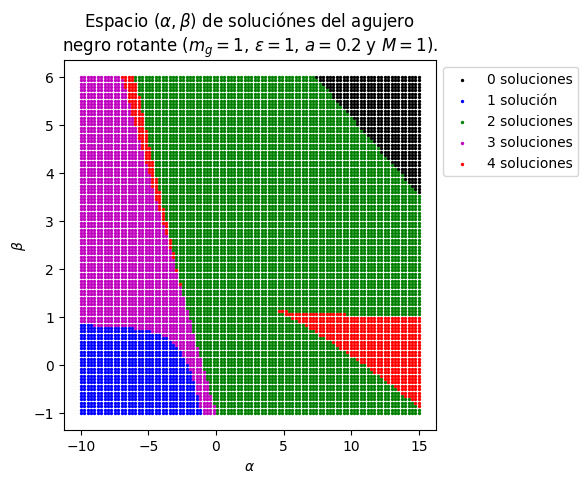

In [58]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(sols_M1_a1[0][0],sols_M1_a1[0][1],s=2,c="k", label="0 soluciones")
mp.scatter(sols_M1_a1[1][0],sols_M1_a1[1][1],s=2,c="b", label="1 solución")
mp.scatter(sols_M1_a1[2][0],sols_M1_a1[2][1],s=2,c="g", label="2 soluciones")
mp.scatter(sols_M1_a1[3][0],sols_M1_a1[3][1],s=2,c="m", label="3 soluciones")
mp.scatter(sols_M1_a1[4][0],sols_M1_a1[4][1],s=2,c="r", label="4 soluciones")

mp.xlabel(r"$\alpha$")
mp.ylabel(r"$\beta$")

mp.title("Espacio ($\\alpha,\\beta$) de soluciónes del agujero\nnegro rotante ($m_g=1$, $\\epsilon=1$, $a=0.2$ y $M=1$).")

mp.legend(bbox_to_anchor=(1,1))

In [52]:
sols_M1_a2 = findSolutions(f=subs(FHorizonte,(a,0.25),(m,1)),
                           maxNumOfSols=4,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

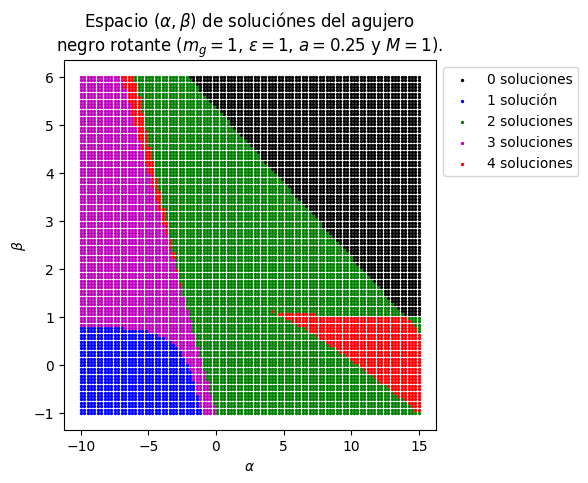

In [53]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(sols_M1_a2[0][0],sols_M1_a2[0][1],s=2,c="k", label="0 soluciones")
mp.scatter(sols_M1_a2[1][0],sols_M1_a2[1][1],s=2,c="b", label="1 solución")
mp.scatter(sols_M1_a2[2][0],sols_M1_a2[2][1],s=2,c="g", label="2 soluciones")
mp.scatter(sols_M1_a2[3][0],sols_M1_a2[3][1],s=2,c="m", label="3 soluciones")
mp.scatter(sols_M1_a2[4][0],sols_M1_a2[4][1],s=2,c="r", label="4 soluciones")

mp.xlabel(r"$\alpha$")
mp.ylabel(r"$\beta$")

mp.title("Espacio ($\\alpha,\\beta$) de soluciónes del agujero\nnegro rotante ($m_g=1$, $\\epsilon=1$, $a=0.25$ y $M=1$).")

mp.legend(bbox_to_anchor=(1,1))

In [ ]:
sols_M1_a3 = findSolutions(f=subs(FHorizonte,(a,0.5),(m,1)),
                           maxNumOfSols=4,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

In [ ]:
mp.figure(figsize=(4.8, 4.8))
mp.scatter(sols_M1_a3[0][0],sols_M1_a3[0][1],s=2,c="k", label="0 soluciones")
mp.scatter(sols_M1_a3[1][0],sols_M1_a3[1][1],s=2,c="b", label="1 solución")
mp.scatter(sols_M1_a3[2][0],sols_M1_a3[2][1],s=2,c="g", label="2 soluciones")
mp.scatter(sols_M1_a3[3][0],sols_M1_a3[3][1],s=2,c="m", label="3 soluciones")
mp.scatter(sols_M1_a3[4][0],sols_M1_a3[4][1],s=2,c="r", label="4 soluciones")

mp.xlabel(r"$\alpha$")
mp.ylabel(r"$\beta$")

mp.title("Espacio ($\\alpha,\\beta$) de soluciónes del agujero\nnegro rotante ($m_g=1$, $\\epsilon=1$, $a=0.5$ y $M=1$).")

mp.legend(bbox_to_anchor=(1,1))